In [64]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [65]:
def step_function(x):
    if x < thres:
        return 0
    else:
        return 1

In [66]:
def gen_training_data(data_point):
    x1 = np.random.random(data_point) #0~1 사이의 값이 무작위로
    x2 = np.random.random(data_point) #0~1 사이의 값이 무작위로
    y = ((x1 + x2) > 1).astype(int)
    training_set = [((x1[i],x2[i]), y[i]) for i in range(len(x1))]

    return training_set
    

In [67]:
thres = 0.5 #역치
w = np.array([0.3, 0.9]) # 랜덤하게
lr = 0.1 #작은수
data_point = 100
epoch = 10
training_set = gen_training_data(data_point)


In [68]:
training_set[0:5]

[((0.12951959328200247, 0.27283382581615934), 0),
 ((0.6970174845567975, 0.7773372788443595), 1),
 ((0.9763941327994416, 0.4666304000722017), 1),
 ((0.2816225994067326, 0.8618074396229523), 1),
 ((0.7391218426535735, 0.5907629052908637), 1)]

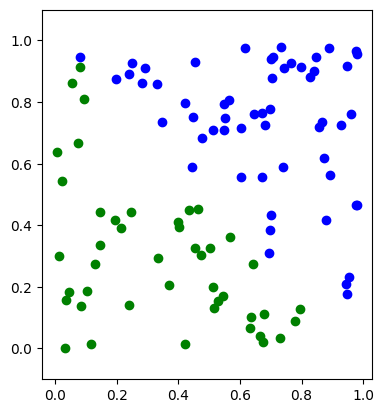

In [69]:
plt.figure(0)
plt.ylim(0.1,1.1)
plt.ylim(-0.1,1.1)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

for x, y in training_set:
    if y == 1:
        plt.plot(x[0],x[1], 'bo') #blue
    else:
        plt.plot(x[0],x[1], 'go') #green
        

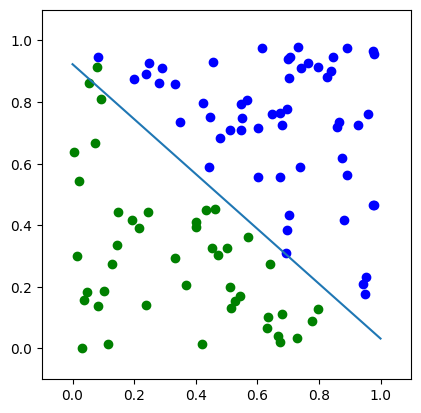

In [72]:
%matplotlib inline
from time import sleep

plt.figure(0)
plt.ylim(0.1,1.1)
plt.ylim(-0.1,1.1)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

#절편과 기울기를 찾는 과정

xx = np.linspace(0,1,50)
for i in range(epoch):
    cnt = 0
    for x,y in training_set:
        clear_output(wait=True)
        #### 퍼셉트론 학습의 모든 것 
        u = sum(x*w) #입력값 -> w, 연결강도 -> w
        error = y-step_function(u)
        for index, value in enumerate(x):
            w[index] = w[index] + lr*error*value
        #### 퍼셉트론 학습의 모든 것

        for xs, ys in training_set[0:cnt]:
            plt.ylim(-0.1,1.1)
            plt.xlim(-0.1,1.1)
            ax = plt.gca()
            ax.set_aspect('equal', adjustable='box')
            
            if ys == 1:
                plt.plot(xs[0], xs[1], 'bo')
            else:
                plt.plot(xs[0], xs[1], 'go')

        yy = -w[1]/w[0] * xx + thres/w[0] # <== w[0]*yy + w[1]*xx = thres
        
        plt.plot(xx,yy)
        plt.show()
        cnt=cnt+1
        sleep(0.01)


In [74]:
w[1]


0.4825554525782443

In [75]:
w[0]


0.5417444716427171

In [76]:
thres

0.5